In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(70, 20), dpi=80)

<Figure size 5600x1600 with 0 Axes>

<Figure size 5600x1600 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SALESDETAILS.csv to SALESDETAILS.csv


In [ ]:
df=pd.read_csv('SALESDETAILS.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sum(n < 0 for n in df['Sales Quantity'].values.flatten())

7225

In [ ]:
df.head()

,Actual Delivery Date,Address Number,CustKey,Backlog Amount,BackOrder Amount,DateKey,Discount Amount,Doc Type,Family Class,Invoice Date,Invoice Number,Item-Branch Key,Item Class,Item Number,Line Desc 1,Line Number,Line Type,List Price,Order Number,Parent Address Number,Payment Terms,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Sales Unit Cost Price,U/M,Unit Price
0,NaN,10025919,10025919,NaN,NaN,7/21/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,2000,C,966.44,200286,10025919,NET,7/21/2008,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,EA,528.8359
1,NaN,10025919,10025919,NaN,NaN,6/27/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,23000,SA,966.44,205053,10025919,215,6/27/2008,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,EA,528.8359
2,NaN,10025919,10025919,NaN,NaN,5/8/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,12000,SA,966.44,202518,10025919,2P1,5/8/2008,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,EA,528.8359
3,NaN,10025919,10025919,NaN,NaN,5/8/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,19000,SA,966.44,202147,10025919,2P1,5/8/2008,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,EA,528.8359
4,NaN,10025919,10025919,NaN,NaN,6/27/2008,NaN,,T21,NaN,NaN,CR-10731,P01,27550,Imagine Popsicles,34000,SA,1084.61,205054,10025919,215,6/27/2008,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,EA,593.4986


In [ ]:
df.columns

Index(['Actual Delivery Date', 'Address Number', 'CustKey', 'Backlog Amount',
       'BackOrder Amount', 'DateKey', 'Discount Amount', 'Doc Type',
       'Family Class', 'Invoice Date', 'Invoice Number', 'Item-Branch Key',
       'Item Class', 'Item Number', 'Line Desc 1', 'Line Number', 'Line Type',
       'List Price', 'Order Number', 'Parent Address Number', 'Payment Terms',
       'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'Sales Unit Cost Price', 'U/M', 'Unit Price'],
      dtype='object')

In [ ]:
df['Sales Price']=df['Sales Price'].fillna(0)
df['Sales Quantity']=df['Sales Quantity'].fillna(0)


In [ ]:
revenue= df['Sales Price']*df['Sales Quantity']

In [ ]:
df['Revenue']=revenue

In [ ]:
df.head(-500)

,Actual Delivery Date,Address Number,CustKey,Backlog Amount,BackOrder Amount,DateKey,Discount Amount,Doc Type,Family Class,Invoice Date,Invoice Number,Item-Branch Key,Item Class,Item Number,Line Desc 1,Line Number,Line Type,List Price,Order Number,Parent Address Number,Payment Terms,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Sales Unit Cost Price,U/M,Unit Price,Revenue
0,NaN,10025919,10025919,NaN,NaN,7/21/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,2000,C,966.44,200286,10025919,NET,7/21/2008,NaN,NaN,NaN,NaN,0.0000,0.0,108,NaN,EA,528.8359,0.00
1,NaN,10025919,10025919,NaN,NaN,6/27/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,23000,SA,966.44,205053,10025919,215,6/27/2008,NaN,NaN,NaN,NaN,0.0000,0.0,108,NaN,EA,528.8359,0.00
2,NaN,10025919,10025919,NaN,NaN,5/8/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,12000,SA,966.44,202518,10025919,2P1,5/8/2008,NaN,NaN,NaN,NaN,0.0000,0.0,108,NaN,EA,528.8359,0.00
3,NaN,10025919,10025919,NaN,NaN,5/8/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,19000,SA,966.44,202147,10025919,2P1,5/8/2008,NaN,NaN,NaN,NaN,0.0000,0.0,108,NaN,EA,528.8359,0.00
4,NaN,10025919,10025919,NaN,NaN,6/27/2008,NaN,,T21,NaN,NaN,CR-10731,P01,27550,Imagine Popsicles,34000,SA,1084.61,205054,10025919,215,6/27/2008,NaN,NaN,NaN,NaN,0.0000,0.0,108,NaN,EA,593.4986,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295636,40145.0,10018868,10018868,NaN,NaN,11/28/2009,195.62,RI,,11/28/2009,228354.0,CR-10897,,39331,Pearl Merlot Wine,13000,SC,217.12,323460,10018868,N60,11/28/2009,238.62,434.24,94.10,144.52,119.3100,2.0,129,47.0500,EA,115.8335,238.62
295637,40121.0,10013899,10013899,NaN,NaN,11/4/2009,89.81,RI,T17,11/4/2009,218238.0,CR-10492,P01,62524,Tell Tale Lettuce,1000,SA,235.10,314012,10013899,230,11/4/2009,145.29,235.10,75.25,70.04,145.2900,1.0,114,75.2521,EA,141.0600,145.29
295638,40012.0,10011979,10011979,NaN,NaN,7/18/2009,-16.05,RI,,7/18/2009,208567.0,CR-10607,,63113,Landslide Columbian Coffee,4001,SC,5.35,300825,10011979,N30,7/17/2009,551.05,535.00,446.34,104.71,5.5105,100.0,145,4.4634,EA,5.3500,551.05
295639,39830.0,10011979,10011979,NaN,NaN,1/17/2009,-16.05,RI,,1/17/2009,220973.0,CR-10607,,63113,Landslide Columbian Coffee,4001,SC,5.35,315894,10011979,N30,1/16/2009,551.05,535.00,446.34,104.71,5.5105,100.0,145,4.4634,EA,5.3500,551.05


In [ ]:
df.head()

,Actual Delivery Date,Address Number,CustKey,Backlog Amount,BackOrder Amount,DateKey,Discount Amount,Doc Type,Family Class,Invoice Date,Invoice Number,Item-Branch Key,Item Class,Item Number,Line Desc 1,Line Number,Line Type,List Price,Order Number,Parent Address Number,Payment Terms,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Sales Unit Cost Price,U/M,Unit Price,Revenue
0,NaN,10025919,10025919,NaN,NaN,7/21/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,2000,C,966.44,200286,10025919,NET,7/21/2008,NaN,NaN,NaN,NaN,0.0,0.0,108,NaN,EA,528.8359,0.0
1,NaN,10025919,10025919,NaN,NaN,6/27/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,23000,SA,966.44,205053,10025919,215,6/27/2008,NaN,NaN,NaN,NaN,0.0,0.0,108,NaN,EA,528.8359,0.0
2,NaN,10025919,10025919,NaN,NaN,5/8/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,12000,SA,966.44,202518,10025919,2P1,5/8/2008,NaN,NaN,NaN,NaN,0.0,0.0,108,NaN,EA,528.8359,0.0
3,NaN,10025919,10025919,NaN,NaN,5/8/2008,NaN,,T21,NaN,NaN,CR-10799,P01,28401,Ebony Prepared Salad,19000,SA,966.44,202147,10025919,2P1,5/8/2008,NaN,NaN,NaN,NaN,0.0,0.0,108,NaN,EA,528.8359,0.0
4,NaN,10025919,10025919,NaN,NaN,6/27/2008,NaN,,T21,NaN,NaN,CR-10731,P01,27550,Imagine Popsicles,34000,SA,1084.61,205054,10025919,215,6/27/2008,NaN,NaN,NaN,NaN,0.0,0.0,108,NaN,EA,593.4986,0.0


In [ ]:
grouped_df = df.groupby(['Line Desc 1'])

In [ ]:
grouped_and_summed = grouped_df.sum()

In [ ]:
grouped_and_summed = grouped_and_summed.reset_index()

In [ ]:
print(grouped_and_summed)

                     Line Desc 1  Actual Delivery Date  ...  Unit Price    Revenue
0          American Beef Bologna            10221194.0  ...  10831.3541   16857.17
1      American Chicken Hot Dogs            11373975.0  ...  24479.5674   37239.73
2             American Cole Slaw            38425518.0  ...   4924.2415    7189.98
3           American Corned Beef             8551194.0  ...  30650.1666  491469.77
4    American Foot-Long Hot Dogs             5443912.0  ...   5223.5460    6404.53
..                           ...                   ...  ...         ...        ...
822         Washington Diet Cola            26980789.0  ...   3209.6773   30713.82
823         Washington Diet Soda             8469937.0  ...  53706.4749  460676.08
824       Washington Mango Drink            12483588.0  ...  76142.5938  296032.18
825      Washington Orange Juice            18380529.0  ...   1903.1136  108952.40
826  Washington Strawberry Drink             2701168.0  ...  10129.3236   92845.75

[82

In [ ]:
df_final=grouped_and_summed.filter(['Line Desc 1','Revenue'], axis=1)


In [ ]:
df_final

,Line Desc 1,Revenue
0,American Beef Bologna,16857.17
1,American Chicken Hot Dogs,37239.73
2,American Cole Slaw,7189.98
3,American Corned Beef,491469.77
4,American Foot-Long Hot Dogs,6404.53
...,...,...
822,Washington Diet Cola,30713.82
823,Washington Diet Soda,460676.08
824,Washington Mango Drink,296032.18
825,Washington Orange Juice,108952.40


In [ ]:
df_final.to_csv('revenuebyP.csv')

In [ ]:
df_final.sort_values('Revenue',ascending=False, inplace=True)

In [ ]:
indexNames = df_final[ df_final['Revenue'] <0].index
df_final.drop(indexNames , inplace=True)

In [ ]:
df_final.tail()

,Line Desc 1,Revenue
607,Medalist Manicotti,76.57
814,Walrus Merlot Wine,69.32
448,Gorilla Large Curd Cottage Cheese,11.49
775,Tell Tale Squash,0.00
309,Ebony Summer Squash,0.00


In [ ]:
dftop5=df_final.head().copy()

In [ ]:
dftop5

,Line Desc 1,Revenue
106,Better Large Canned Shrimp,19986736.62
479,High Top Dried Mushrooms,17915562.97
690,Red Spade Pimento Loaf,7702664.11
95,Better Canned Tuna in Oil,7474155.20
308,Ebony Squash,7362096.29


In [ ]:
x=dftop5['Line Desc 1']
y=dftop5['Revenue']

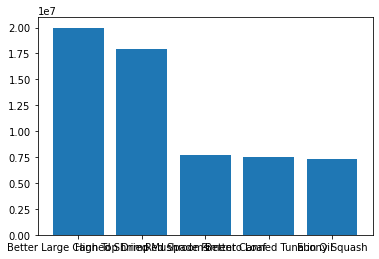

In [ ]:
plt.bar(x,y)
plt.show()